#Importando Bibliotecas

A análise exploratória visa identificar relações entre as variáveis, extrair insights preliminares e encaminhar a modelagem para os paradigmas mais comuns de machine learning

In [4]:
import pandas as pd                 # Manipulação dos dados
import warnings as wa               # Ignorar avisos gerados pelo uso do "pandas"
import numpy as np                  # Cálculos algébricos
import matplotlib.pyplot as plt     # Construção dos gráficos
import plotly.express as px         # Construção dos gráficos

### Ignorando warnings (avisos) do tipo FutureWarning (Aviso futuro) ###
wa.simplefilter(action = 'ignore', category = FutureWarning)
pd.options.mode.chained_assignment = None

#Carregando o Dataset

In [29]:
path_dados = "https://github.com/edneres/Bancos_de_Dados/blob/main/station_data_dataverse.csv?raw=true" # Diretamente do GitHub
#path_dados = "https://github.com/edneres/Bancos_de_Dados/blob/main/station_data_dataverse.csv"

df_dados = pd.read_csv(path_dados)
#df_dados = pd.read_csv(path_dados, skiprows=[30])
#df_dados = pd.read_csv(path_dados, error_bad_lines=False)
#type(df_dados)

df_dados["Evento"] = np.arange(len(df_dados))
df_dados

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,Evento
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,3,0,1,0,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,3,0,0,1,0,0,0,0,0,1
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,3,0,0,0,0,1,0,0,0,2
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,3,0,0,1,0,0,0,0,0,3
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,3,0,0,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,...,2,0,0,0,1,0,0,0,1,3390
3391,3758092,6.86,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,...,2,0,0,0,0,1,0,0,1,3391
3392,5858374,6.07,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,...,3,0,0,1,0,0,0,0,1,3392
3393,2586645,5.74,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,...,2,0,0,0,1,0,0,0,1,3393


In [31]:
df_dados.head(8)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,Evento
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,3,0,1,0,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,3,0,0,1,0,0,0,0,0,1
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,3,0,0,0,0,1,0,0,0,2
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,3,0,0,1,0,0,0,0,0,3
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,3,0,0,0,1,0,0,0,0,4
5,4099366,2.14,0.00,0014-12-12 14:38:44,0014-12-12 15:04:04,14,15,0.422222,Fri,android,...,3,0,0,0,0,1,0,0,0,5
6,5084244,0.30,0.00,0014-12-12 15:08:40,0014-12-12 15:47:04,15,15,0.640000,Fri,android,...,3,0,0,0,0,1,0,0,0,6
7,2948436,1.82,0.00,0014-12-17 20:30:25,0014-12-17 21:31:04,20,21,1.010833,Wed,android,...,3,0,0,1,0,0,0,0,0,7


In [32]:
df_dados.loc[150:160]

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,Evento
150,1310541,4.77,0.0,0015-08-27 14:26:42,0015-08-27 17:51:06,14,17,3.406667,Thu,android,...,3,0,0,0,1,0,0,0,0,150
151,2051880,3.79,0.0,0015-08-28 15:04:52,0015-08-28 17:10:11,15,17,2.088611,Fri,android,...,3,0,0,0,0,1,0,0,0,151
152,2151405,6.56,0.0,0015-08-31 17:07:42,0015-08-31 21:04:08,17,21,3.940556,Mon,android,...,3,1,0,0,0,0,0,0,0,152
153,9830354,5.07,0.0,0015-09-01 16:34:05,0015-09-01 20:33:06,16,20,3.983611,Tue,android,...,3,0,1,0,0,0,0,0,0,153
154,7366688,4.17,0.0,0015-09-02 14:27:08,0015-09-02 16:28:07,14,16,2.016389,Wed,android,...,3,0,0,1,0,0,0,0,0,154
155,3690401,2.87,0.0,0015-09-02 16:50:08,0015-09-02 20:48:08,16,20,3.966667,Wed,android,...,3,0,0,1,0,0,0,0,0,155
156,2666943,10.01,0.0,0015-09-04 16:44:07,0015-09-04 19:45:12,16,19,3.018056,Fri,android,...,3,0,0,0,0,1,0,0,0,156
157,8966239,6.33,0.0,0015-09-08 13:45:37,0015-09-08 17:21:08,13,17,3.591944,Tue,android,...,3,0,1,0,0,0,0,0,0,157
158,1060291,1.30,0.0,0015-09-08 17:29:25,0015-09-08 20:57:08,17,20,3.461944,Tue,android,...,3,0,1,0,0,0,0,0,0,158
159,6178031,4.16,0.0,0015-09-09 17:26:14,0015-09-09 20:31:06,17,20,3.081111,Wed,android,...,3,0,0,1,0,0,0,0,0,159


#Tratamento dos Dados

In [193]:
df_dados.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip', 'Evento'],
      dtype='object')

In [33]:
# Renomear as colunas
df_dados = df_dados.rename(columns = {'sessionId': 'ID Sessão', 'userId': 'ID Usuário','dollars': 'Valor (US$)', 'distance': 'Distância (km)', 'chargeTimeHrs': 'Tempo Carregamento (hrs)',
                                    'weekday': 'Dia Semana', 'facilityType': 'Tipo Instalação', 'kwhTotal': 'Total Energia (kWh)'})

# Criando um novo DF
colunas = ['ID Sessão', 'ID Usuário', 'Valor (US$)', 'Distância (km)', 'Tempo Carregamento (hrs)', 'Total Energia (kWh)', 'Dia Semana', 'Tipo Instalação', 'Evento']
df_reduzido = df_dados[colunas]

df_reduzido.head()

,ID Sessão,ID Usuário,Valor (US$),Distância (km),Tempo Carregamento (hrs),Total Energia (kWh),Dia Semana,Tipo Instalação,Evento
0,1366563,35897499,0.00,NaN,1.510556,7.78,Tue,3,0
1,3075723,35897499,0.00,NaN,2.177222,9.74,Wed,3,1
2,4228788,35897499,0.58,NaN,4.671667,6.76,Fri,3,2
3,3173284,35897499,0.00,NaN,1.768333,6.17,Wed,3,3
4,3266500,35897499,0.00,NaN,0.298611,0.93,Thu,3,4


In [35]:
# Substituir NaN por 0 na coluna 'Distância'
df_reduzido['Distância (km)'] = df_reduzido['Distância (km)'].fillna(0)
# fillna(0) >> método do Pandas que permite preencher valores ausentes (NaN) em um DataFrame ou em uma Series com um valor específico
df_reduzido

,ID Sessão,ID Usuário,Valor (US$),Distância (km),Tempo Carregamento (hrs),Total Energia (kWh),Dia Semana,Tipo Instalação,Evento
0,1366563,35897499,0.00,0.000000,1.510556,7.78,Tue,3,0
1,3075723,35897499,0.00,0.000000,2.177222,9.74,Wed,3,1
2,4228788,35897499,0.58,0.000000,4.671667,6.76,Fri,3,2
3,3173284,35897499,0.00,0.000000,1.768333,6.17,Wed,3,3
4,3266500,35897499,0.00,0.000000,0.298611,0.93,Thu,3,4
...,...,...,...,...,...,...,...,...,...
3390,7021565,59574735,0.00,21.488943,3.463889,6.74,Thu,2,3390
3391,3758092,59574735,0.00,21.488943,2.971389,6.86,Fri,2,3391
3392,5858374,32070852,0.00,3.761165,3.495556,6.07,Wed,3,3392
3393,2586645,58023207,0.00,7.517330,2.202778,5.74,Thu,2,3393


In [36]:
# Converter de milhas para quilômetros
df_reduzido['Distância (km)'] = df_reduzido['Distância (km)'] * 1.60934
df_reduzido

,ID Sessão,ID Usuário,Valor (US$),Distância (km),Tempo Carregamento (hrs),Total Energia (kWh),Dia Semana,Tipo Instalação,Evento
0,1366563,35897499,0.00,0.000000,1.510556,7.78,Tue,3,0
1,3075723,35897499,0.00,0.000000,2.177222,9.74,Wed,3,1
2,4228788,35897499,0.58,0.000000,4.671667,6.76,Fri,3,2
3,3173284,35897499,0.00,0.000000,1.768333,6.17,Wed,3,3
4,3266500,35897499,0.00,0.000000,0.298611,0.93,Thu,3,4
...,...,...,...,...,...,...,...,...,...
3390,7021565,59574735,0.00,34.583015,3.463889,6.74,Thu,2,3390
3391,3758092,59574735,0.00,34.583015,2.971389,6.86,Fri,2,3391
3392,5858374,32070852,0.00,6.052993,3.495556,6.07,Wed,3,3392
3393,2586645,58023207,0.00,12.097940,2.202778,5.74,Thu,2,3393


In [37]:
# Arredondar os valores das colunas para 3 casas decimais
df_reduzido['Distância (km)'] = df_reduzido['Distância (km)'].round(3)
df_reduzido['Tempo Carregamento (hrs)'] = df_reduzido['Tempo Carregamento (hrs)'].round(3)
df_reduzido

,ID Sessão,ID Usuário,Valor (US$),Distância (km),Tempo Carregamento (hrs),Total Energia (kWh),Dia Semana,Tipo Instalação,Evento
0,1366563,35897499,0.00,0.000,1.511,7.78,Tue,3,0
1,3075723,35897499,0.00,0.000,2.177,9.74,Wed,3,1
2,4228788,35897499,0.58,0.000,4.672,6.76,Fri,3,2
3,3173284,35897499,0.00,0.000,1.768,6.17,Wed,3,3
4,3266500,35897499,0.00,0.000,0.299,0.93,Thu,3,4
...,...,...,...,...,...,...,...,...,...
3390,7021565,59574735,0.00,34.583,3.464,6.74,Thu,2,3390
3391,3758092,59574735,0.00,34.583,2.971,6.86,Fri,2,3391
3392,5858374,32070852,0.00,6.053,3.496,6.07,Wed,3,3392
3393,2586645,58023207,0.00,12.098,2.203,5.74,Thu,2,3393


#Energia Consumida Para Carregamento de um Carro Elétrico

##Gráfico de Linhas
1. Rrepresentação visual de dados que utiliza pontos conectados por linhas retas;
2. Amplamente utilizado para exibir a tendência ou o padrão de mudança de uma variável ao longo de um eixo de tempo ou outro eixo contínuo;

  2.1 Útil principalmente quando se quer visualizar a evolução de uma variável ao longo do tempo ou em relação a outra variável contínua.

3. Exemplos de dados melhor representados:

   3.1 Dados Temporais;

   3.2 Tendências;
   
   3.3 Comparação de Variáveis.
   

O gráfico mostra a energia total consumida por cerca de 3.400 instâncias de carregamento. A potência média (kWh) é de cerca de 6 kWh. Vemos picos acima de 10 em aglomerados. Provavelmente, eles são os Teslas com classificação mais alta com capacidade de carregamento rápido (já que consomem mais energia).

###Criação de Gráfico de Linhas Com a Biblioteca "matplotlib.pyplot"

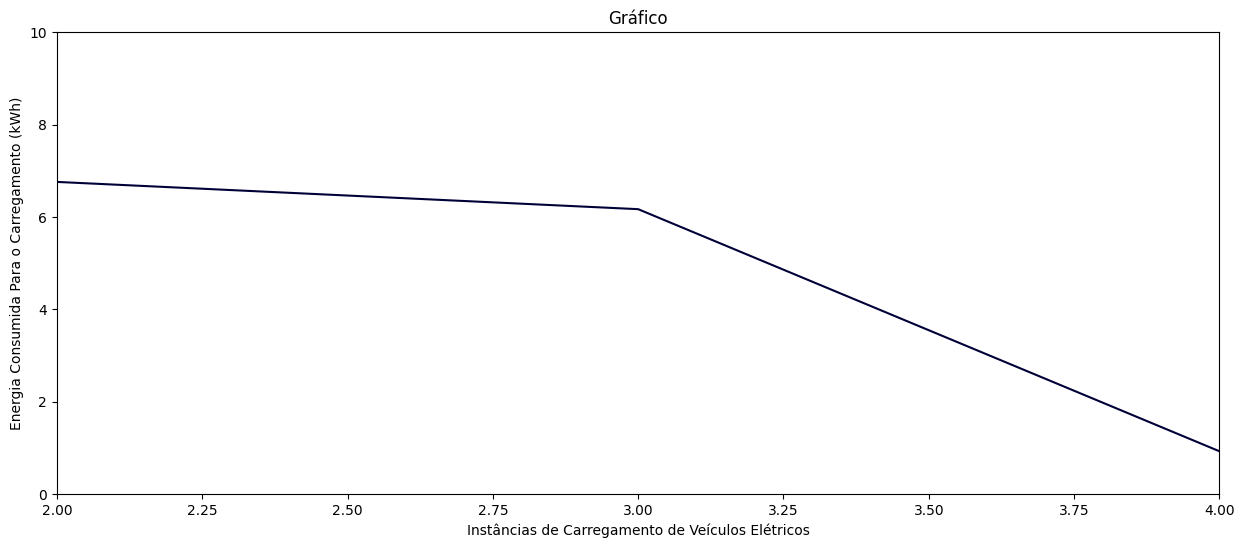

In [42]:
plt.figure(figsize = (15, 6))  # Largura: x polegadas, Altura: y polegadas

plt.plot(df_reduzido['Evento'],
         df_reduzido['Total Energia (kWh)'],
         color = '#000038') # #000038

plt.xlabel('Instâncias de Carregamento de Veículos Elétricos')
plt.ylabel('Energia Consumida Para o Carregamento (kWh)')
plt.title('Gráfico')

# Definir limites dos eixos x e y para o zoom
plt.xlim(2, 4)
plt.ylim(0, 10)

plt.show()

###Criação de Gráfico de Linhas Com a Biblioteca "plotly.express"

In [45]:
grafico_linha = px.line(df_reduzido,                # DataFrame utilizado
                        x = 'Evento',               # Coluna para o eixo x do gráfico
                        y = "Total Energia (kWh)",  # Coluna para o eixo y do gráfico
                        labels = {"Evento" : "Instâncias de Carregamento de Veículos Elétricos",
                                  "Total Energia (kWh)" : "Energia Consumida Para o Carregamento (kWh)"},
                        title = 'Gráfico')  # color_discrete_sequence = ['']

# Atualizar o layout do gráfico para centralizar o título
grafico_linha.update_layout(title={'text': 'Gráfico', 'x': 0.5, 'y': 0.9})

grafico_linha.show()

In [46]:
print("Potência média consumida: {} kwh".format(df_reduzido["Total Energia (kWh)"].mean()))
print("Potência máxima consumida: {} kwh".format(df_reduzido["Total Energia (kWh)"].max()))
print("Potência mínima consumida: {} kwh".format(df_reduzido["Total Energia (kWh)"].min()))

Potência média consumida: 5.809628865979382 kwh
Potência máxima consumida: 23.68 kwh
Potência mínima consumida: 0.0 kwh


#Tempo Consumido Para o Carregamento de um Veículo Elétrico

Como podemos ver no gráfico abaixo, os tempos de carregamento geralmente variam entre 1 a 4 horas, e os carregamentos lentos demoram mais de 6/7 horas.

In [47]:
df_reduzido.columns

Index(['ID Sessão', 'ID Usuário', 'Valor (US$)', 'Distância (km)',
       'Tempo Carregamento (hrs)', 'Total Energia (kWh)', 'Dia Semana',
       'Tipo Instalação', 'Evento'],
      dtype='object')

In [49]:
### Criar Gráfico de Linhas ###
x = df_reduzido['Evento']
y = df_reduzido['Tempo Carregamento (hrs)']

grafico_linha2 = px.line(df_reduzido,
                         x = x,
                         y = y,
                         labels = {"Evento" : "Instâncias de Carregamento de Veículos Elétricos",
                                    "Tempo Carregamento (hrs)" : "Nº de Horas"},
                        title = 'Tempo Consumido Para Carregamento de Veículos Elétricos (horas)')

### Encontrar o ponto mais alto ###
indice_max = y.idxmax()
x_max = x[indice_max]
y_max = y[indice_max]

### Calcular a média dos dados ###
media = df_reduzido["Tempo Carregamento (hrs)"].mean()

### Adicionar anotação para o ponto mais alto ###
grafico_linha2.add_annotation(x = x_max,
                              y = y_max,
                              text = f'Máximo: {y_max}',
                              showarrow = True,
                              arrowhead = 2)

### Adicionar linha horizontal para a média ###
grafico_linha2.add_hline(y = media,
                         line_dash = "dash",
                         annotation_text = f'Média: {media:.2f}',
                        line_color='red',
                         annotation_position = 'top right')


# Ajustar posição da anotação "média"
grafico_linha2.update_annotations(yshift=30)

grafico_linha2.show()

1. Tesla Model S (Long Range): Cerca de 8 horas em um carregador de parede Tesla de 11 kW.

2. Tesla Model 3 (Standard Range Plus): Cerca de 8-10 horas em um carregador de parede Tesla de 11 kW.

3. Nissan Leaf (40 kWh): Cerca de 6-8 horas em um carregador de parede de 7 kW.

4. Chevrolet Bolt EV: Cerca de 9-10 horas em um carregador de parede de 7 kW.

5. Audi e-tron: Cerca de 8-10 horas em um carregador de parede de 11 kW.

6. BMW i3 (42 kWh): Cerca de 6-8 horas em um carregador de parede de 7 kW.

7. Hyundai Kona Electric: Cerca de 8-10 horas em um carregador de parede de 7 kW.

In [50]:
print(f"ID Sessão:      {df_dados['ID Sessão'][173]}")
#print(f"ID Sessão:      {df_dados.loc[173, 'ID Sessão']}")
#print(f"ID Sessão:      {df_dados.iloc[173, 0]}")
print(f"ID Localização: {df_dados['locationId'][173]}")
print(f"ID Usuário:     {df_dados['ID Usuário'][173]}")

ID Sessão:      2162299
ID Localização: 751082
ID Usuário:     65023200


#Tempo Médio de Carregamento Por Dia

In [51]:
df_reduzido.columns

Index(['ID Sessão', 'ID Usuário', 'Valor (US$)', 'Distância (km)',
       'Tempo Carregamento (hrs)', 'Total Energia (kWh)', 'Dia Semana',
       'Tipo Instalação', 'Evento'],
      dtype='object')

In [52]:
df_tempo_carregamento_dia_da_semana = df_reduzido.groupby('Dia Semana').mean()
#print(type(df_tempo_carregamento_dia_da_semana))
df_tempo_carregamento_dia_da_semana

,ID Sessão,ID Usuário,Valor (US$),Distância (km),Tempo Carregamento (hrs),Total Energia (kWh),Tipo Instalação,Evento
Dia Semana,,,,,,,,
Fri,5.718676e+06,5.701220e+07,0.106803,31.869479,2.763279,5.772639,2.481967,1696.613115
Mon,5.473551e+06,5.540027e+07,0.117922,33.491864,2.899104,5.564432,2.446429,1698.711039
Sat,5.725675e+06,8.513633e+07,0.016129,50.837774,2.297484,6.365968,1.306452,1737.790323
Sun,5.802680e+06,8.081757e+07,0.000000,16.984167,2.100333,7.632500,1.166667,1513.958333
Thu,5.442267e+06,5.666445e+07,0.100776,32.877929,2.789264,5.762082,2.485714,1670.941497
Tue,5.492157e+06,5.815988e+07,0.106835,33.112236,2.894806,6.002976,2.434646,1710.407874
Wed,5.310558e+06,5.645490e+07,0.169453,33.292799,2.937230,5.820196,2.443198,1713.388499


In [53]:
classificacao = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
classificacaoIndex = dict(zip(classificacao,range(len(classificacao))))
# Função zip: [('Sun', 0), ('Mon', 1), ('Tue', 2), ('Wed', 3), ('Thu', 4), ('Fri', 5), ('Sat', 6)]
classificacaoIndex

{'Sun': 0, 'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6}

In [54]:
df_tempo_carregamento_dia_da_semana['ID Dia'] = df_tempo_carregamento_dia_da_semana.index
df_tempo_carregamento_dia_da_semana['ID Dia'] = df_tempo_carregamento_dia_da_semana['ID Dia'].map(classificacaoIndex)
# Mapeia os valores da coluna 'ID Dia' usando o dicionário "classificacaoIndex".
# Os valores mapeados substituirão os valores originais da coluna 'ID Dia'.
df_tempo_carregamento_dia_da_semana.sort_values('ID Dia', inplace = True)
df_tempo_carregamento_dia_da_semana

,ID Sessão,ID Usuário,Valor (US$),Distância (km),Tempo Carregamento (hrs),Total Energia (kWh),Tipo Instalação,Evento,ID Dia
Dia Semana,,,,,,,,,
Sun,5.802680e+06,8.081757e+07,0.000000,16.984167,2.100333,7.632500,1.166667,1513.958333,0
Mon,5.473551e+06,5.540027e+07,0.117922,33.491864,2.899104,5.564432,2.446429,1698.711039,1
Tue,5.492157e+06,5.815988e+07,0.106835,33.112236,2.894806,6.002976,2.434646,1710.407874,2
Wed,5.310558e+06,5.645490e+07,0.169453,33.292799,2.937230,5.820196,2.443198,1713.388499,3
Thu,5.442267e+06,5.666445e+07,0.100776,32.877929,2.789264,5.762082,2.485714,1670.941497,4
Fri,5.718676e+06,5.701220e+07,0.106803,31.869479,2.763279,5.772639,2.481967,1696.613115,5
Sat,5.725675e+06,8.513633e+07,0.016129,50.837774,2.297484,6.365968,1.306452,1737.790323,6


In [56]:
df_tempo_carregamento_dia_da_semana['Dia Semana'] = df_tempo_carregamento_dia_da_semana.index
df_tempo_carregamento_dia_da_semana

,ID Sessão,ID Usuário,Valor (US$),Distância (km),Tempo Carregamento (hrs),Total Energia (kWh),Tipo Instalação,Evento,ID Dia,Dia Semana
Dia Semana,,,,,,,,,,
Sun,5.802680e+06,8.081757e+07,0.000000,16.984167,2.100333,7.632500,1.166667,1513.958333,0,Sun
Mon,5.473551e+06,5.540027e+07,0.117922,33.491864,2.899104,5.564432,2.446429,1698.711039,1,Mon
Tue,5.492157e+06,5.815988e+07,0.106835,33.112236,2.894806,6.002976,2.434646,1710.407874,2,Tue
Wed,5.310558e+06,5.645490e+07,0.169453,33.292799,2.937230,5.820196,2.443198,1713.388499,3,Wed
Thu,5.442267e+06,5.666445e+07,0.100776,32.877929,2.789264,5.762082,2.485714,1670.941497,4,Thu
Fri,5.718676e+06,5.701220e+07,0.106803,31.869479,2.763279,5.772639,2.481967,1696.613115,5,Fri
Sat,5.725675e+06,8.513633e+07,0.016129,50.837774,2.297484,6.365968,1.306452,1737.790323,6,Sat


###Gráfico de Barras

1. Representação visual de dados em forma de barras retangulares, onde o comprimento de cada barra é proporcional à quantidade ou valor associado a uma categoria específica.
2. Amplamente utilizado para comparar diferentes categorias entre si e para visualizar dados discretos ou discretizados.
3. Especialmente útil nas seguintes situações:

  3.1 Comparação de categorias

  3.2 Visualização de distribuição

  3.3 Tendências ao longo do tempo

  3.4 Análise de comparações e padrões

Além disso, um gráfico de barras pode fornecer informações como valores específicos para cada categoria, identificar categorias que se destacam ou estão abaixo da média, mostrar a ordem de importância das categorias e destacar discrepâncias significativas.

Como podemos ver no(s) gráfico(s) abaixo, o tempo médio de carregamento atinge o pico na quarta-feira e é relativamente baixo no domingo

####Gráfico de Barras Com a Biblioteca "matplotlib.pyplot"

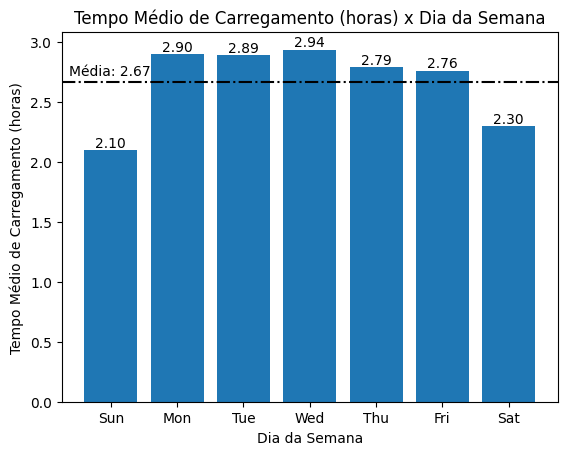

In [57]:
# Cores das barras
cores = ['g', 'b', 'c', 'm', 'y', 'k', '#000038'] # w

# Cria o Gráfico
plt.bar(df_tempo_carregamento_dia_da_semana['Dia Semana'], df_tempo_carregamento_dia_da_semana['Tempo Carregamento (hrs)']) # color =

# Configurar rótulos e título
plt.xlabel('Dia da Semana')
plt.ylabel('Tempo Médio de Carregamento (horas)')
plt.title('Tempo Médio de Carregamento (horas) x Dia da Semana')

# Adicionar o valor em cima de cada barra
for i, v in enumerate(df_tempo_carregamento_dia_da_semana['Tempo Carregamento (hrs)']):
    plt.annotate(f'{v:.2f}', xy = (i, v), ha = 'center', va = 'bottom')

# Adicionar linha de média
media = np.mean(df_tempo_carregamento_dia_da_semana['Tempo Carregamento (hrs)'])
plt.axhline(y = media, color = 'black', linestyle = '-.', label = 'Média')

# Adicionar valor da média acima da linha
plt.annotate(f'Média: {media:.2f}', xy = (0, media), xytext = (-30, 5), textcoords = 'offset points', color = 'black', fontsize = 10, ha = 'left')

plt.show()

####Gráfico de Barras Com a Biblioteca "plotly.express"

In [59]:
grafico_barras = px.bar(df_tempo_carregamento_dia_da_semana,
                        x = "Dia Semana",
                        y = "Tempo Carregamento (hrs)",
                        labels = {'Tempo Carregamento (hrs)':'Tempo Médio de Carregamento (horas)',
                                  "Dia Semana" : "Dia da Semana"},
                        title ='Tempo Médio de Carregamento (horas) x Dia da Semana',
                        color ='Dia Semana') # Dia Semana

grafico_barras.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False) # cliponaxis=False: Define se as barras devem ser cortadas para se ajustarem ao eixo.
grafico_barras.update_traces(width = 0.6)
grafico_barras.update_layout(barmode = 'group', xaxis_tickangle = -45) # title={'x': 0.5}
                                                                       # width=800, height=600

# Calcular a média
media = df_tempo_carregamento_dia_da_semana['Tempo Carregamento (hrs)'].mean()

# Adicionar linha de média
grafico_barras.add_hline(y = media, line_dash = 'dash', line_color = 'black', annotation_text = f'Média: {media:.2f}', annotation_position = 'top')

# Atualizar layout para posicionar a label acima da linha
grafico_barras.update_layout(annotations = [dict(x = 0.1, y = media, text = f'Média: {media:.2f}', showarrow = False)])


grafico_barras.show()

### Exemplo

In [211]:
# DataFrame de exemplo
data = {'Categoria': ['A', 'B', 'C'],
        'Valor1': [10, 20, 30],
        'Valor2': [20, 40, 60]}
df = pd.DataFrame(data)

# Gráfico de barras com diferentes modos
fig = px.bar(df, x='Categoria', y=['Valor1', 'Valor2'], barmode='group')
#fig = px.bar(df, x='Categoria', y=['Valor1', 'Valor2'], barmode='stack')
#fig = px.bar(df, x='Categoria', y=['Valor1', 'Valor2'], barmode='relative')

fig.show()


###Gráfico de Linhas

In [212]:
grafico_linha3 = px.line(df_tempo_carregamento_dia_da_semana,
                         x = "Dia Semana",
                         y = "Tempo Carregamento (hrs)",
                         labels = {'Tempo Carregamento (hrs)':'Tempo Médio de Carregamento (horas)',
                                   "Dia Semana" : "Dia da Semana"},
                         markers = True,
                         title = 'Tempo Médio de Carregamento (horas) x Dia da Semana')

grafico_linha3.show()

#Análise de Instalações no Âmbito dos Veículos Elétricos

##Gráfico de Pizza

In [213]:
#df_dados.columns
df_reduzido["Tipo Instalação"].value_counts()

3    1832
2     862
1     593
4     108
Name: Tipo Instalação, dtype: int64

In [61]:
categorias = ['R&D','Office','Manufacturing','Others']
valores = [1832, 862, 593, 108]
# (manufatura = 1, escritório = 2, pesquisa e desenvolvimento = 3, outros = 4)

###Gráfico de Pizzas Com a Biblioteca "matplotlib.pyplot"

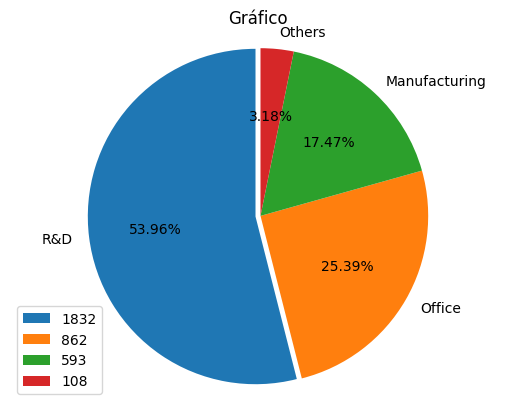

In [63]:
# Dar destaque à primeira fatia (índice 1, maior valor)
destaque = [0.03, 0, 0, 0]

plt.pie(valores,
        labels = categorias,
        explode = destaque,
        startangle = 90, # 10
        autopct = '%1.2f%%')

plt.title('Gráfico')

# Adicionar uma legenda personalizada
plt.legend(valores, loc = 'lower left')

# Configurar aspectos visuais
plt.axis('equal')

plt.show()

###Gráfico de Pizzas Com a Biblioteca "plotly.expresst"

In [64]:
grafico_pizza = px.pie(values = valores,
                       names = categorias,
                       #template = 'plotly_dark',
                       title = 'Gráfico de Pizza com Destaque')

# Definir destaque para um pedaço específico (índice 1)
grafico_pizza.update_traces(hole = 0.1, pull = [0.05, 0, 0, 0])

grafico_pizza.show()

#Análise da Distância Entre a Moradia e o Loc. de Carregamento

In [217]:
#df_reduzido.columns
#df_dados.columns

In [218]:
df_distancia = df_reduzido.groupby('ID Usuário')['Distância (km)'].mean().reset_index()
df_distancia

,ID Usuário,Distância (km)
0,10427670,1.373455
1,10909503,1.995100
2,11299464,53.173852
3,13066218,43.774600
4,14260257,24.076000
...,...,...
80,94947534,0.000000
81,95411349,5.113000
82,95980995,32.939000
83,97867440,39.652096


In [219]:
df_distancia['ID Usuário'] = range(85)
df_distancia

,ID Usuário,Distância (km)
0,0,1.373455
1,1,1.995100
2,2,53.173852
3,3,43.774600
4,4,24.076000
...,...,...
80,80,0.000000
81,81,5.113000
82,82,32.939000
83,83,39.652096


In [220]:
grafico = px.line(df_distancia,
                  x = 'ID Usuário',
                  y = 'Distância (km)',
                  labels = {'ID Usuário': 'ID do Usuário',
                            'Distância (km)': 'Distância (km)'})

# Cálculo da média
media = df_distancia['Distância (km)'].mean()

# Criação do gráfico de linha com linha para a média
grafico = px.line(df_distancia, x = 'ID Usuário', y = 'Distância (km)')
grafico.add_hline(y=media, line_dash='dash', line_color='red', annotation_text=f'Média: {media:.2f}')


# Exibição do gráfico
grafico.show()